# KEGG ROC new Train (predict data)

## Import data

In [23]:
import numpy as np
from sklearn.preprocessing import label_binarize

pdata = np.load('predict_results_no_y_1/y_predict.npy')
print(pdata.shape)

odata = np.genfromtxt('data/mmukegg_new_new_unique_rand_labelx.txt', delimiter = '\t', dtype=None)
original = []
for i in range(len(odata)):
    original.append(odata[i][2])
original = label_binarize(original, classes=[0,1,2])
n_classes = original.shape[1]

(92472, 3)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  import sys


## ROC curve and AUC

In [24]:
from sklearn import metrics

fpr = []
tpr = []
roc_auc = []
for i in range(n_classes):
    ftemp, ttemp, _ = metrics.roc_curve(original[:,i], pdata[:,i])
    fpr.append(ftemp)
    tpr.append(ttemp)
    roc_auc.append(metrics.auc(fpr[i], tpr[i]))

roc_auc

[0.8251950616761494, 0.7952208803163615, 0.8043437056876548]

## Plot ROC curve

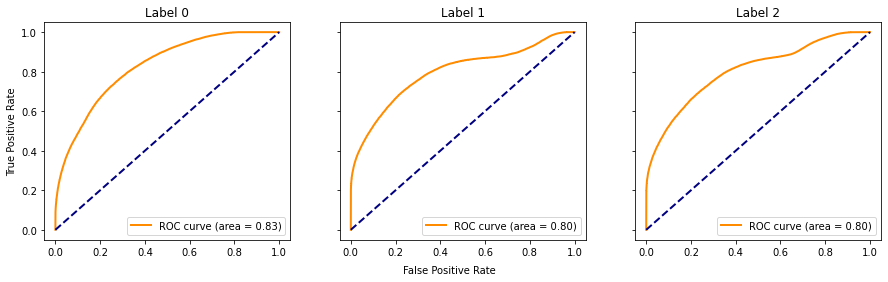

In [25]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_figwidth(15)
lw = 2
ax1.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)
ax1.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

ax2.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
ax2.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

ax3.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
ax3.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

ax1.set_title('Label 0')
ax1.legend(loc = 'lower right')
ax2.set_title('Label 1')
ax2.legend(loc = 'lower right')
ax3.set_title('Label 2')
ax3.legend(loc = 'lower right')

ax1.set(ylabel='True Positive Rate')
fig.text(0.5, 0.01, 'False Positive Rate', ha='center')
plt.show()